In [17]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#as number of features or dimension grows, the amount of data we need to generalize accurately grows exponentially

In [3]:
df = pd.read_csv('single_family_home_values.csv')
X = df[['bedrooms','bathrooms','rooms','squareFootage','lotSize','yearBuilt','priorSaleAmount']]
X.fillna(0, inplace=True)

c:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [4]:
#this notebook imvolves combining some percentage of original features to make new one and reduce number of dimension/ columns in our dataset
pca = PCA(4)# number of features in new set
X_transformed = pca.fit_transform(X)
pca.components_ # we have 4 features and each features is made up of some percentage of original 7 features it shows that percentage for each feature

array([[ 4.34835866e-07,  1.39033126e-06,  1.76645671e-06,
         9.91884229e-04,  1.22556479e-03,  8.13159056e-06,
         9.99998757e-01],
       [ 4.59899754e-05,  8.88602690e-05,  1.02614970e-04,
         9.51591022e-02,  9.95457158e-01,  2.83604230e-03,
        -1.31440908e-03],
       [-7.41279240e-04, -1.10361769e-03, -1.93477104e-03,
        -9.95458475e-01,  9.51576074e-02,  1.08902953e-03,
         8.70755249e-04],
       [ 2.87494377e-03, -3.44585965e-03,  6.23055904e-03,
        -8.24565322e-04,  2.92725018e-03, -9.99965895e-01,
         5.35419321e-06]])

In [5]:
X_transformed.shape

(15000, 4)

In [6]:
y = df.estimated_value

In [7]:
#using original features
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

#using tranformed features
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X_transformed, y)
lr.fit(X_transformed_train,y_train)
print(lr.score(X_transformed_test, y_test))
#according to score transformed dataset is worse than original


0.7453689638340233
0.7169161512471427


In [10]:
import math
from sklearn.preprocessing import StandardScaler

In [14]:
sns.set_style("white")

df = pd.read_csv('ESSdata.csv')
df.head(10)




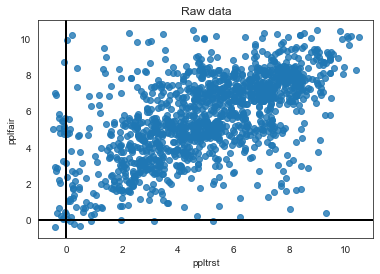

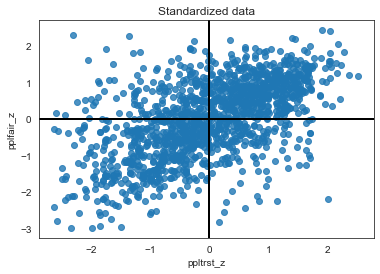

In [19]:
# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot', 'ppltrst', 'pplfair', 'pplhlp']
].dropna()

df_pca.head()
t = sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()
